In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
data1 = pd.read_csv('AQI_Data_2015.csv')
data1.head()

,Date,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
0,1/1/15,7,37,26,55,0,55
1,1/2/15,8,42,20,73,0,73
2,1/3/15,10,45,17,84,0,84
3,1/4/15,10,40,19,86,0,86
4,1/5/15,9,42,12,69,0,69


In [63]:
# to explicitly convert the date column to type DATETIME
data1['Date'] = pd.to_datetime(data1['Date'])

In [64]:
data1.dtypes

Date          datetime64[ns]
AQI_CO                 int64
AQI_NO2                int64
AQI_O3                 int64
AQI_PM_2_5             int64
AQI_PM_10              int64
AQI_Max                int64
dtype: object

In [65]:
data1 = data1.set_index('Date')
data1.head()

,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
Date,,,,,,
2015-01-01,7,37,26,55,0,55
2015-01-02,8,42,20,73,0,73
2015-01-03,10,45,17,84,0,84
2015-01-04,10,40,19,86,0,86
2015-01-05,9,42,12,69,0,69


In [68]:
## create new dataframe with AQI_Max

df = data1[["AQI_Max"]]
df.head()

,AQI_Max
Date,
2015-01-01,55
2015-01-02,73
2015-01-03,84
2015-01-04,86
2015-01-05,69


In [69]:
df.describe()

,AQI_Max
count,365.000000
mean,38.331507
std,14.959551
min,7.000000
25%,28.000000
50%,35.000000
75%,44.000000
max,100.000000


<AxesSubplot:xlabel='Date'>

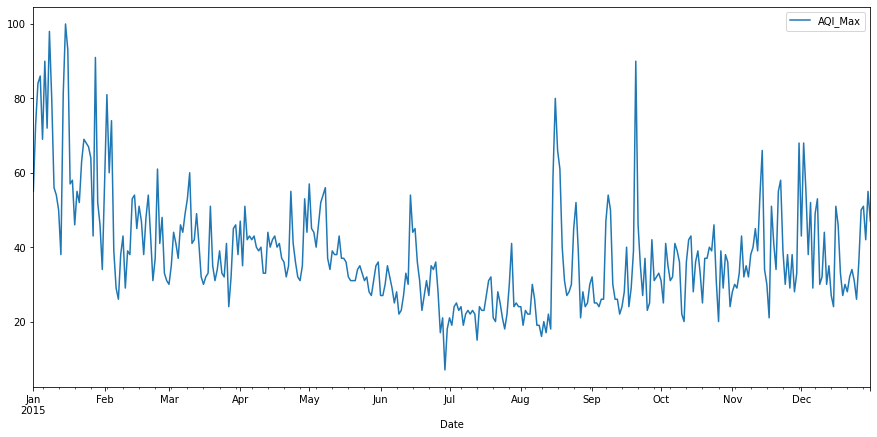

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [72]:
from statsmodels.tsa.stattools import adfuller

In [85]:
result=adfuller(df['AQI_Max'])

In [84]:
def adfuller_test(AQI_Max):
    result=adfuller(AQI_Max)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['AQI_Max'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -4.445969327421089
p-value : 0.0002459018246547617
#Lags Used : 7
Number of Observations : 357


In [86]:
df['AQI_Max First Difference'] = df['AQI_Max'] - df['AQI_Max'].shift(1)
df['Seasonal First Difference']=df['AQI_Max']-df['AQI_Max'].shift(12)
df.head()

/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AQI_Max,AQI_Max First Difference,Seasonal First Difference
Date,,,
2015-01-01,55,NaN,NaN
2015-01-02,73,18.0,NaN
2015-01-03,84,11.0,NaN
2015-01-04,86,2.0,NaN
2015-01-05,69,-17.0,NaN


In [87]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.4551074694262685
p-value : 1.4901301536296494e-08
#Lags Used : 14
Number of Observations : 338


<AxesSubplot:xlabel='Date'>

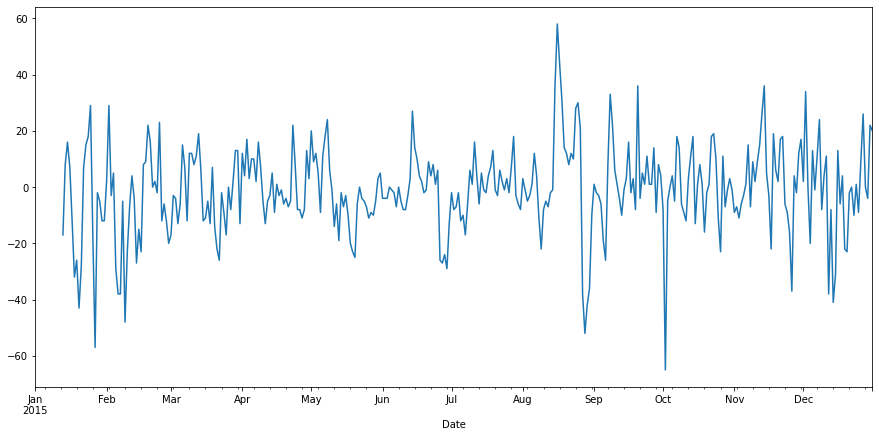

In [88]:
df['Seasonal First Difference'].plot()

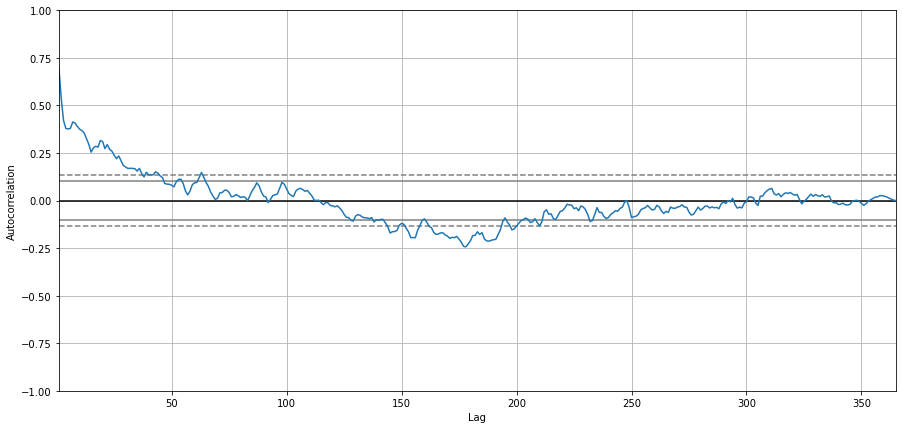

In [89]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AQI_Max'])
plt.show()

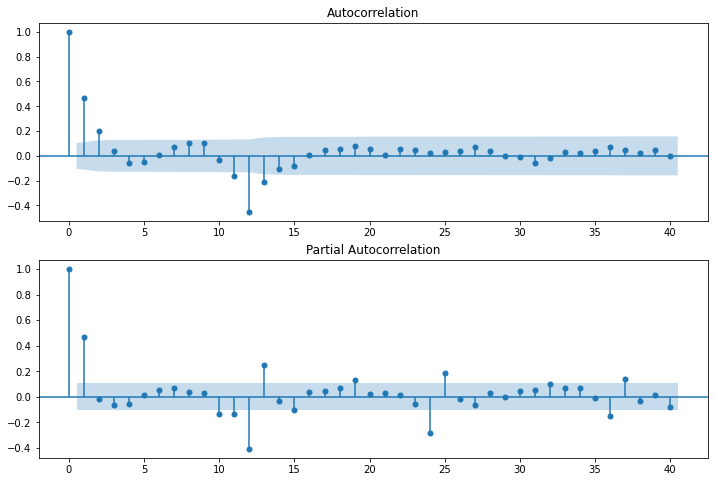

In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [92]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['AQI_Max'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.AQI_Max   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1364.442
Method:                       css-mle   S.D. of innovations             10.257
Date:                Sun, 25 Apr 2021   AIC                           2736.885
Time:                        20:08:37   BIC                           2752.473
Sample:                    01-02-2015   HQIC                          2743.081
                         - 12-31-2015                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0790      0.072     -1.091      0.275      -0.221       0.063
ar.L1.D.AQI_Max     0.4444      0.055      8.080      0.000       0.337       0.552
ma.L1.D.AQI_Max    -0.9278      0.021    -44.880      0.000      -0.968      -0.887
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2501           +0.0000j            2.2501            0.0000
MA.1            1.0778           +0.0000j            1.0778            0.0000
-----------------------------------------------------------------------------
"""

/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

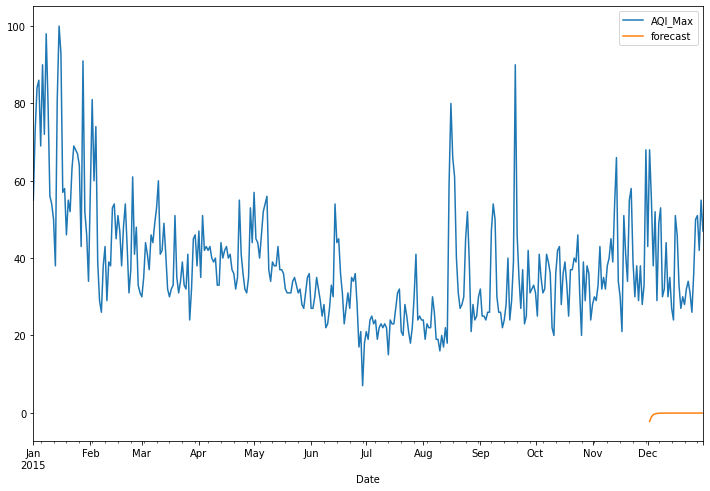

In [95]:
df['forecast']=model_fit.predict(start=335,end=365,dynamic=True)
df[['AQI_Max','forecast']].plot(figsize=(12,8))

/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Date'>

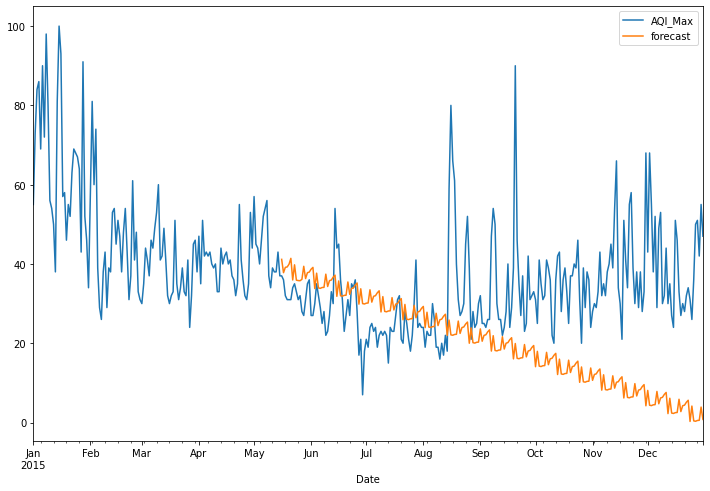

In [116]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['AQI_Max'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=135,end=365,dynamic=True)
df[['AQI_Max','forecast']].plot(figsize=(12,8))

/Users/nataliavelasquez/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


<AxesSubplot:>

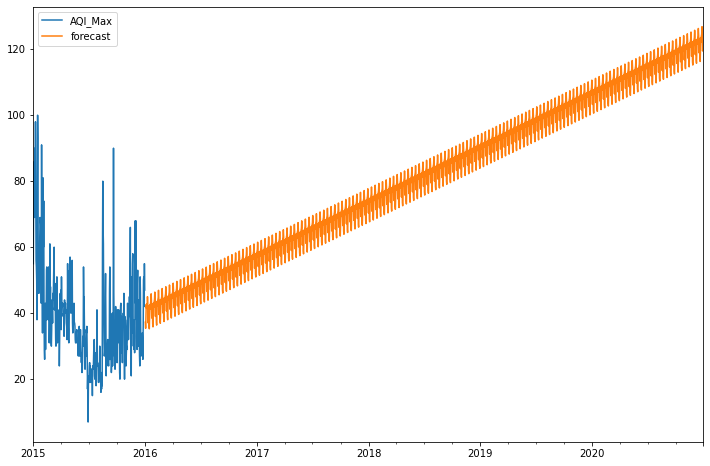

In [110]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,1825)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 366, end = 2200, dynamic= True)
future_df[['AQI_Max', 'forecast']].plot(figsize=(12, 8))

In [102]:
future_df.head()

,AQI_Max,AQI_Max First Difference,Seasonal First Difference,forecast
2015-01-01,55,NaN,NaN,NaN
2015-01-02,73,18.0,NaN,NaN
2015-01-03,84,11.0,NaN,NaN
2015-01-04,86,2.0,NaN,NaN
2015-01-05,69,-17.0,NaN,NaN


In [117]:
future = future_df[['forecast']]
future = future.dropna()
future.head(20)

,forecast
2016-01-02,37.247336
2016-01-03,35.410525
2016-01-04,39.552002
2016-01-05,42.653434
2016-01-06,41.452222
2016-01-07,42.816054
2016-01-08,42.684095
2016-01-09,44.995319
2016-01-10,43.246380
2016-01-11,37.050368
